# Evolutionary Dynamics

We will now consider how Game Theory can be used to study evolutionary processes. The main difference is that we now consider not two player games but game with an **infinite** population. The strategies will make up a dynamic population that changes over time.

## Reproduction

[Video](https://youtu.be/kBhoG3pjyG0?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

Consider a simple model of population growth: let $x(t)$ denote the size of the population at time $t$ and let as assume that the rate of growth is $a$ per population size:

$$\frac{dx}{dt}=ax$$

Note that from here on we will refer to this rate as a **fitness**.

The solution of this differential equation is:

$$x(t)=x_0e^{at}\text{ where }x_0=x(0)$$

In [1]:
import sympy as sym
sym.init_printing()
x = sym.Function('x')
t, a = sym.symbols('t, a')
sym.dsolve(sym.Derivative(x(t), t) - a * x(t), x(t))

(This is exponential growth.)

We can also use scipy to solve this differential equation numerically (relevant for more complex dynamics):

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import odeint

t = np.linspace(0, 10, 100)  # Obtain 100 time points


def dx(x, t, a):
    """Define the derivate of x"""
    return a * x

If $a=10>0$:

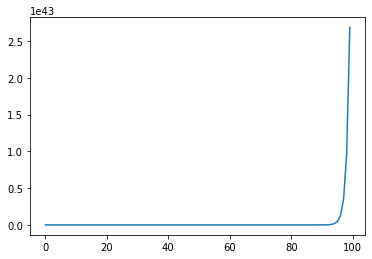

In [3]:
a = 10
xs = odeint(func=dx, y0=1, t=t, args=(a,))
plt.plot(xs);

If $a=-10<0$:

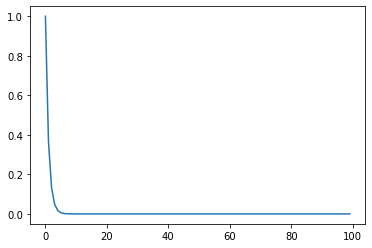

In [4]:
a = -10
xs = odeint(func=dx, y0=1, t=t, args=(a,))
plt.plot(xs);

## Selection

[Video](https://youtu.be/ERbQGLLNGYo?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

Reproduction alone is not enough to study evolutionary processes. Let us consider a population made up of two types of individuals:

- $x(t)$ denotes the first type;
- $y(t)$ denotes the second type.

Let us assume the same expressions for the as before:

$$\frac{dx}{dt}=ax\qquad\frac{dy}{dt}=by$$

both these population will increase or decrease independantly so there's not much of interest there **but** if we introduce the following:

$$
\rho(t) = \frac{x(t)}{y(t)}
$$

then $\lim_{t\to\infty}\rho(t)$ indicates which type takes over the population over time.

We have:

$$
\frac{d\rho}{dt} = \frac{\frac{dx}{dt}y -  \frac{dy}{dt}x}{y ^ 2} = \frac{xy(a - b)}{y^2} 
$$

which gives:

$$
\frac{d\rho}{dt} = (a-b)\rho
$$

which has solution (this is just the same differential equation as the previous section):

$$
\rho(t) = \rho_0e^{(a-b)t}\text{ where }\rho_0=\rho(0)
$$

note that even if both population grow, but one grows faster than the other (eg $a > b$) then the overall population will grow but one will take over:

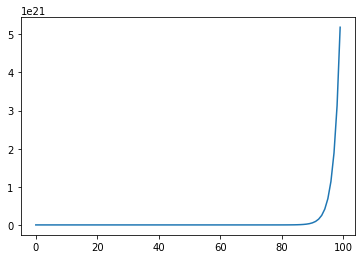

In [5]:
def drho(rho, t, a, b):
    """Define the derivate of x"""
    return (a - b) * rho

a, b = 10, 5
rhos = odeint(func=drho, y0=1, t=t, args=(a, b))
plt.plot(rhos);

## Selection with constant population size

[Video](https://youtu.be/_bsaV5sq6ZU?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

Let us consider the case of $x(t) + y(t)=1$: so the case of a constant population size (choosing a constant of 1 is just a question of scale). For this to be possible, the rates need to reduced:

$$\frac{dx}{dt}=x(a - \phi)\qquad\frac{dy}{dt}=y(b - \phi)$$

because $x(t) + y(t)=1$:

$$\frac{dx}{dt} + \frac{dy}{dt} = 0$$

also:

$$\frac{dx}{dt} + \frac{dy}{dt} = ax + by - \phi(x + y)= ax + by - \phi$$

thus $\phi=ax+by$ (this corresponds to the average of the fitness).

Substituting $y=1-x$ we have:

$$\frac{dx}{dt}=x(a - ax-b(1-x))=x(a(1 - x)-b(1-x))$$

giving:

$$\frac{dx}{dt}=x(a-b)(1-x)$$

We do not need to solve this differential equation. There are two stable points:

- $x=0$: no population of first type: no change
- $x=1$: no population of second type: no change

Also:

- $a=b$: if both types have the same fitness: no change

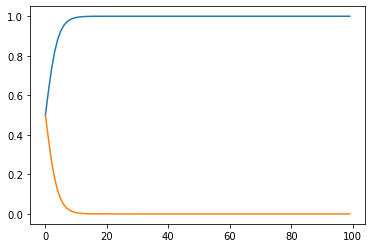

In [6]:
def dxy(xy, t, a, b):
    """
    Define the derivate of x and y. 
    It takes `xy` as a vector
    """
    x, y = xy
    phi = a * x + b * y
    return x * (a - phi), y * (b - phi)

a, b = 10, 5
xys = odeint(func=dxy, y0=[.5, .5], t=t, args=(a, b))
plt.plot(xys);

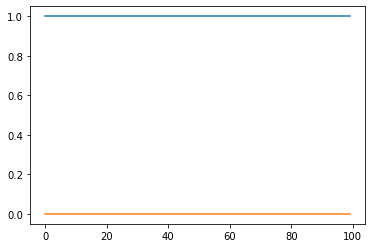

In [7]:
a, b = 10, 5
xys = odeint(func=dxy, y0=[1, 0], t=t, args=(a, b))
plt.plot(xys);

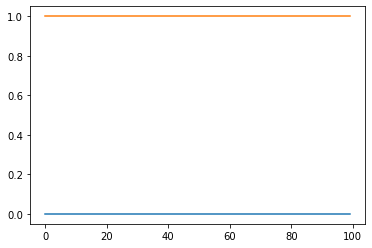

In [8]:
a, b = 10, 5
xys = odeint(func=dxy, y0=[0, 1], t=t, args=(a, b))
plt.plot(xys);

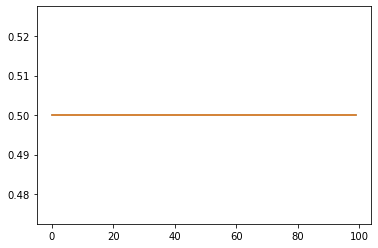

In [9]:
a, b = 5, 5
xys = odeint(func=dxy, y0=[.5, .5], t=t, args=(a, b))
plt.plot(xys);